# Kaggle House Price
https://www.kaggle.com/c/house-prices-advanced-regression-techniques
<br>
<br>
* 'y' -> 'SalePrice'
* Mertic : 'RMSE'

In [29]:
import warnings
warnings.filterwarnings('ignore')

# Data Load
* 'Kaggle_House_Price.csv' Github에서 읽어오기

In [30]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Kaggle_House_Price.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [31]:
DF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# I. Data Preprocessing

> ## 1) 결측치 확인



In [32]:
DF.shape

(1460, 81)

In [33]:
isnull_series = DF.isnull().sum()

isnull_series[isnull_series > 0].sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

> ## 2) Drop Columns

* 결측치가 많은 컬럼 제거

In [34]:
DF.drop(['Id', 'PoolQC' , 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],
         axis = 1,
         inplace = True)

* '숫자형' Null 컬럼 평균값 대체

In [35]:
DF.fillna(DF.mean(),inplace = True)

In [36]:
null_column_count = DF.isnull().sum()[DF.isnull().sum() > 0]
DF.dtypes[null_column_count.index]

MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object

> ## 3) Encoding

* get_dummies( )

In [37]:
print('get_dummies() 수행 전 데이터 Shape:', DF.shape)
DF_OHE = pd.get_dummies(DF)
print('get_dummies() 수행 후 데이터 Shape:', DF_OHE.shape)

get_dummies() 수행 전 데이터 Shape: (1460, 75)
get_dummies() 수행 후 데이터 Shape: (1460, 271)


* 처리 결과 확인

In [38]:
DF_OHE.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 271, dtype: int64

> ## 4) 'SalePrice' 분포

* 정규분포 형태가 아님

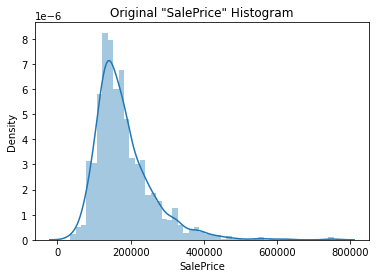

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Original "SalePrice" Histogram')
sns.distplot(DF_OHE['SalePrice'])
plt.show()

* Log Transformed
 - 정규분포 형태 변환

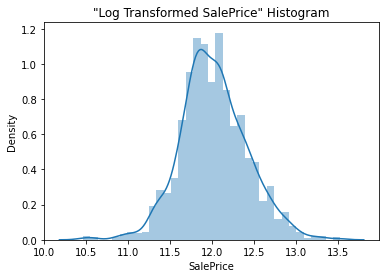

In [40]:
import numpy as np

plt.title('"Log Transformed SalePrice" Histogram')
log_SalePrice = np.log1p(DF_OHE['SalePrice'])
sns.distplot(log_SalePrice)

* 적용

In [42]:
# original_SalePrice = DF_OHE['SalePrice']

DF_OHE['SalePrice'] = np.log1p(DF_OHE['SalePrice'])

* Log 변환

In [43]:
np.log1p(40000)

10.596659732783579

> ## 5) train_test_split( )

In [21]:
from sklearn.model_selection import train_test_split

X = DF_OHE.drop('SalePrice',
                axis = 1,
                inplace = False)
y = DF_OHE['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 2045)

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1022, 270), (1022,), (438, 270), (438,))

# II. EDA

In [48]:
mse_sqrt = {}

In [49]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold

> ## 1) Multivariate Regression

In [51]:
from sklearn.linear_model import LinearRegression

MR = LinearRegression(n_jobs = -1)

MR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [52]:
mse = np.sqrt(mean_squared_error(y_test, MR.predict(X_test)))
mse_sqrt['Multi Regression'] = mse
mse_sqrt

{'Multi Regression': 0.010652302576544675}

> ## 2) Decision Tree Regressor

In [59]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(criterion = 'mse')

In [60]:
params = {'max_depth' : [5, 10, 15]}

In [61]:
grid_cv = GridSearchCV(DTR,
                       param_grid = params,
                       scoring = 'neg_mean_squared_error',
                       cv = KFold(n_splits = 5),
                       refit = True,
                       n_jobs = -1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1, param_grid={'max_depth': [5, 10, 15]},
             pre_dispatch='2*n_jobs', refit=True, retur

In [62]:
mse = np.sqrt(mean_squared_error(y_test, grid_cv.best_estimator_.predict(X_test)))
mse_sqrt['Decision Tree Regression'] = mse
mse_sqrt

{'Decision Tree Regression': 0.015410632953009129,
 'Multi Regression': 0.010652302576544675}

> ## 3) Random Forest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()


In [65]:
params = {'n_estimators' : [500, 1000, 1500, 2000],
          'max_features' : [2, 4, 6],
          'max_depth' : [5, 10, 15]}
          

In [66]:
grid_cv = GridSearchCV(RFR,
                       param_grid = params,
                       scoring = 'neg_mean_squared_error',
                       cv = KFold(n_splits = 5),
                       refit = True,
                       n_jobs = -1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             ve

In [67]:
mse = np.sqrt(mean_squared_error(y_test, grid_cv.best_estimator_.predict(X_test)))
mse_sqrt['Random Forest Regression'] = mse
mse_sqrt

{'Decision Tree Regression': 0.015410632953009129,
 'Multi Regression': 0.010652302576544675,
 'Random Forest Regression': 0.01172497493140225}

# III. MSE 비교

In [68]:
mse_sqrt_sorted = dict(sorted(mse_sqrt.items(), key = lambda x:x[1]))

mse_sqrt_sorted

{'Decision Tree Regression': 0.015410632953009129,
 'Multi Regression': 0.010652302576544675,
 'Random Forest Regression': 0.01172497493140225}

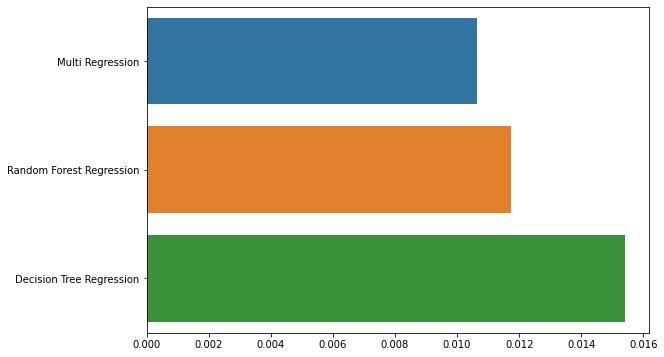

In [69]:
plt.figure(figsize = (9, 6))
sns.barplot(list(mse_sqrt_sorted.values()), list(mse_sqrt_sorted.keys()))
plt.show()

* 현재 Multi Regression 모델이 정밀도가 가장 높다